In [124]:
import scipy
import scipy.io as scio
from scipy import stats
from scipy import ndimage
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
x=5
img=plt.imread('./ShanghaiTech/part_A/train_data/images/IMG_'+str(x)+'.jpg')
mat = scio.loadmat('./ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_'+str(x)+'.mat')

In [100]:
print(mat['image_info'])

[[array([[(array([[168.93991471, 651.20488748],
       [464.12200787, 255.35733758],
       [469.23271568, 253.18915851],
       ...,
       [905.97784109, 525.60088471],
       [  9.84996896, 358.85562997],
       [ 24.17164728, 354.76372187]]), array([[585]], dtype=uint16))]],
      dtype=[('location', 'O'), ('number', 'O')])]]


In [104]:
print(img.shape)

(683, 1024, 3)


In [84]:
print(mat['image_info'][0][0][0][0][0])

[[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]


In [137]:

def gaussian_filter_density(gts):
    densities = []
    for gt in gts:
        print(gt.shape)
        density = np.zeros(gt.shape, dtype=np.float32)
        gt_count = np.count_nonzero(gt)
        if gt_count == 0:
            return density

        pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
        #print("pts=",pts)
        leafsize = 2048
        # build kdtree
        #print 'build kdtree...'
        tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
        # query kdtree
        #print 'query kdtree...' 
        distances, locations = tree.query(pts, k=4, eps=10.)
        

        #print 'generate density...'
        for i, pt in enumerate(pts):
            print("i=",i)
            pt2d = np.zeros(gt.shape, dtype=np.float32)
            pt2d[pt[1],pt[0]] = 1.
            if gt_count > 1:
                sigma = distances[i][1] #((distances[i][1]+distances[i][2]+distances[i][3])/3)*0.3 #
                sigma1= ((distances[i][1]+distances[i][2])/2
                sigma2=
            else:
                sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
            density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
        #print 'done.'
        densities.append(density)
    return densities

k = np.zeros((img.shape[0],img.shape[1]))
gt = mat["image_info"][0][0][0][0][0]
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1
        
print("sum de k = ", np.sum(k))
dens=gaussian_filter_density([k])
print(dens[0])

sum de k =  584.0
(683, 1024)
i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
i= 74
i= 75
i= 76
i= 77
i= 78
i= 79
i= 80
i= 81
i= 82
i= 83
i= 84
i= 85
i= 86
i= 87
i= 88
i= 89
i= 90
i= 91
i= 92
i= 93
i= 94
i= 95
i= 96
i= 97
i= 98
i= 99
i= 100
i= 101
i= 102
i= 103
i= 104
i= 105
i= 106
i= 107
i= 108
i= 109
i= 110
i= 111
i= 112
i= 113
i= 114
i= 115
i= 116
i= 117
i= 118
i= 119
i= 120
i= 121
i= 122
i= 123
i= 124
i= 125
i= 126
i= 127
i= 128
i= 129
i= 130
i= 131
i= 132
i= 133
i= 134
i= 135
i= 136
i= 137
i= 138
i= 139
i= 140
i= 141
i= 142
i= 143
i= 144
i= 145
i= 146
i= 147
i= 148
i= 149
i= 150
i= 151
i= 152
i= 153
i=

0.2082009


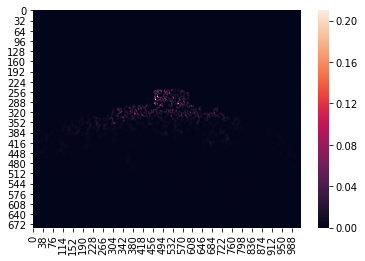

In [136]:
print(np.max(dens[0]))
import seaborn as sbn
ax=sbn.heatmap(dens[0],vmin=0, vmax=0.21)

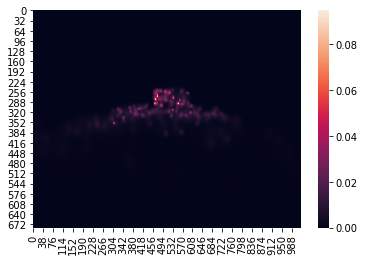

In [138]:
ax1=sbn.heatmap(dens[0])